In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from textblob import TextBlob
import matplotlib.pyplot as plt
import itertools
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
print(os.listdir("../input"))


/kaggle/input/tweets-bollywood-movie-kabir-singh/twitter_kabir_singh_bollywood_movie.csv
['tweets-bollywood-movie-kabir-singh']


In [2]:
import nltk
from sklearn.model_selection import train_test_split
import csv
import nltk.classify.util
from nltk.corpus import stopwords
from nltk.classify import NaiveBayesClassifier
from nltk.tokenize import word_tokenize
import IPython
import re
from bs4 import BeautifulSoup
plt.style.use('fivethirtyeight') #538
cols = ['id','type','time','author','author_id','re_tweeter','associated_tweet','text','links','hashtags','mentions','reply_count','favorite_count','retweet_count','lang','text_raw'
]
dataframe = pd.read_csv("../input/tweets-bollywood-movie-kabir-singh/twitter_kabir_singh_bollywood_movie.csv", header=None , names=cols )
dataframe.head()
dataframe.describe()

,id,type,time,author,author_id,re_tweeter,associated_tweet,text,links,hashtags,mentions,reply_count,favorite_count,retweet_count,lang,text_raw
count,12597,12597,12597,12597,12597,1,12597,12597,12597,12597,12597,12597,12597,12597,12597,12597
unique,2,2,2,8686,5578,1,10,12357,4633,2611,1043,55,327,143,2,12426
top,1.14E+18,tweet,1.56E+12,MouthShut_com,1.14E+18,re_tweeter,1.14E+18,watching Kabir Singh at INOX Leisure Ltd. …,[],['#KabirSingh'],[],0,0,0,en,Kabir Singh's Special only on Amazon.Classic S...
freq,12596,12596,12596,54,438,1,12543,21,7871,4104,7437,9241,4126,8722,12596,12


0
                                                    orig            id  \
0      @shahidkapoor I am in love with kabir @Kabirsi...  1.743972e+08   
1      That's because you are sweet teddy bear guy an...  9.400000e+17   
2      I’m obsessed with Bekhayali and Kaise Hua #Kab...  6.440021e+07   
3      The character of Kabir needs a psychological t...  1.029538e+08   
4      @Advani_Kiara You are such a beautiful.person ...  3.796988e+08   
...                                                  ...           ...   
12489  #KabirSingh#NikitaDutta #KiaraAdvani  #JiaShar...  7.180000e+17   
12490  #KabirSingh Day 1 crossed 20 cr. Blockbuster o...  1.271346e+09   
12491  #KabirSingh shuts down #Bharat . Let's see @Su...  1.100000e+18   
12492  #KabirSingh a film worth watching....The Entry...  2.430064e+09   
12493  #KabirSingh an Adult film, family audience wil...  1.896737e+09   

        pubtime  favcount  retweetcount  \
0      1.56E+12         0             0   
1      1.56E+12        

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


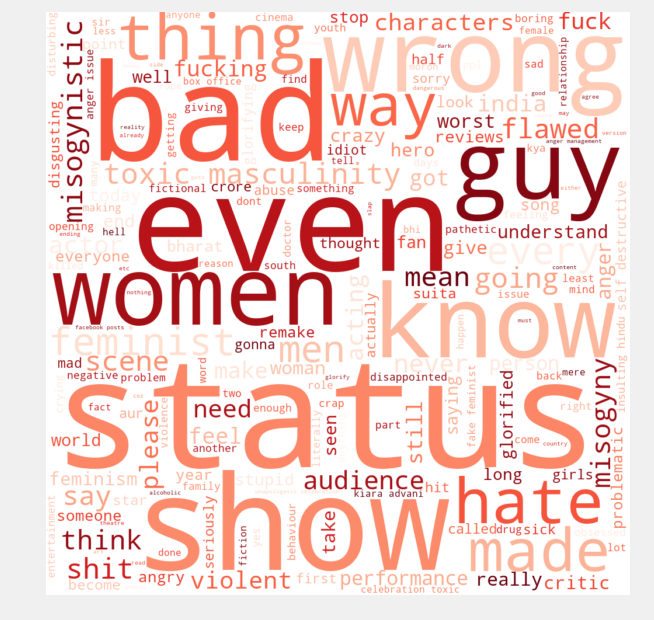

Accuracy of Naive Bayes: 89.70917225950782
Trees: 1
Scores: [99.62962962962963, 99.62962962962963, 100.0, 100.0, 100.0]
Mean Accuracy of Random Forest: 99.852%
Trees: 5
Scores: [100.0, 99.62962962962963, 99.25925925925925, 100.0, 100.0]
Mean Accuracy of Random Forest: 99.778%
Trees: 10
Scores: [99.25925925925925, 99.62962962962963, 100.0, 100.0, 100.0]
Mean Accuracy of Random Forest: 99.778%
Confusion Matrix:
[3 1 1 1 2 2 3 1 2 3 1 1 1 2 1 1 2 1 2 1 2 1 1 2 1 3 1 2 1 1 1 1 1 1 1 2 1
 1 1 2 1 2 2 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 1 2 2 1 3 1 1 1 2 2
 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2 2 1 2 2 2 1 2 2 1 2 1 1 2 2 2 1 1 2 1 2
 1 1 2 1 2 1 2 2 1 2 1 1 1 1 2 1 2 1 1 2 3 2 1 1 2 1 1 1 1 1 1 1 2 1 2 1 2
 2 1 1 1 1 2 1 2 1 1 1 3 1 2 1 1 1 2 1 2 1 2 2 1 2 2 2 1 3 1 1 1 2 2 2 1 1
 1 1 2 2 3 2 1 1 1 1 1 1 1 1 1 1 1 3 2 2 2 1 1 1 1 1 1 3 2 1 2 1 1 3 1 1 1
 2 1 1 1 2 1 1 1 1 1 1 2 1 2 2 1 1 1 2 1 1 1 1 2 2 2 1 2 1 1 2 1 3 1 1 2 1
 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[258   0   0]
 [  0 165   0]
 [  0   1  23]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       258
           2       0.99      1.00      1.00       165
           3       1.00      0.96      0.98        24

    accuracy                           1.00       447
   macro avg       1.00      0.99      0.99       447
weighted avg       1.00      1.00      1.00       447

KNN
[[240  17   1]
 [ 42 122   1]
 [  0   7  17]]
              precision    recall  f1-score   support

           1       0.85      0.93      0.89       258
           2       0.84      0.74      0.78       165
           3       0.89      0.71      0.79        24

    accuracy                           0.85       447
   macro avg       0.86      0.79      0.82       447
weighted avg       0.85      0.85      0.85       447

CNN
Accuracy: 0.5928411633109619
[[196  66   1]
 [ 89  66   0]
 [ 13  13   3]]
              precision    recall  f1-score   support

        

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


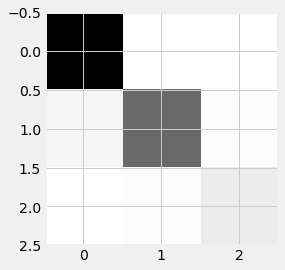

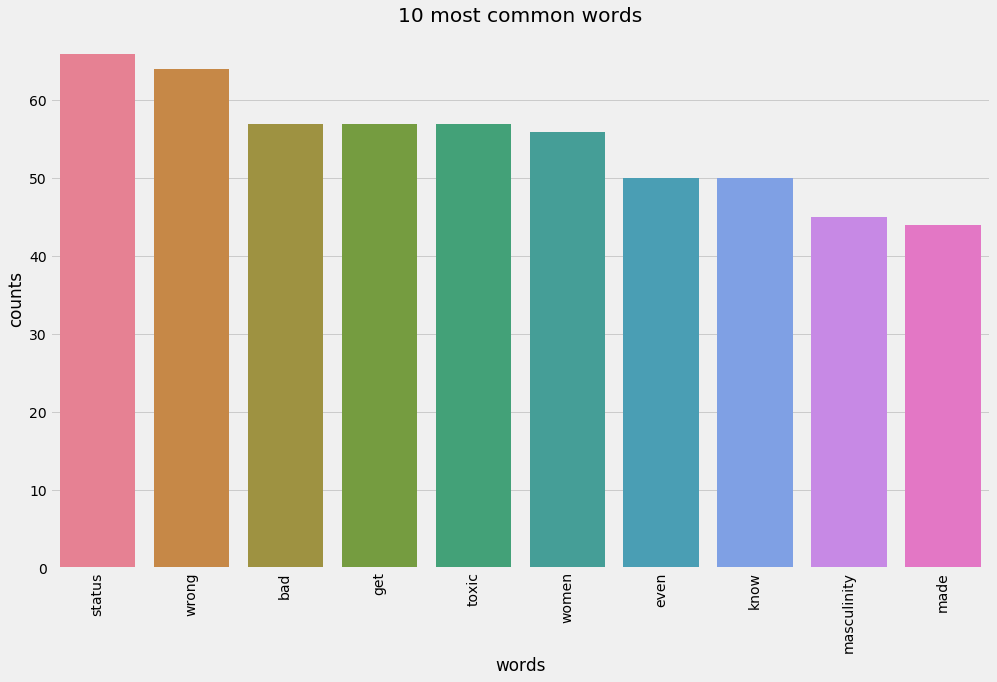

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                43560     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 43,571
Trainable params: 43,571
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 0.5634
Testing Accuracy:  0.5884
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 70, 50)            217800    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
____________________

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:805: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


Actual loss: 8.987337
performing gradient check for parameter U with size 1000. 
Gradient check error: parameter = U ix = (0, 3)
+h Loss: 18.307080
-h Loss: 18.307296
Estimated gradient: -0.108091
Backpropagation gradient: -0.108091
Relative error: 0.000000
29.3 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2019-09-05 07:26:19: loss after num_examples_seen=0 epoch=0: 8.379412
2019-09-05 07:27:10: loss after num_examples_seen=907 epoch=1: 8.376310
2019-09-05 07:28:01: loss after num_examples_seen=1814 epoch=2: 8.372991
2019-09-05 07:28:53: loss after num_examples_seen=2721 epoch=3: 8.369166
2019-09-05 07:29:44: loss after num_examples_seen=3628 epoch=4: 8.364497
2019-09-05 07:30:34: loss after num_examples_seen=4535 epoch=5: 8.358568
2019-09-05 07:31:25: loss after num_examples_seen=5442 epoch=6: 8.350840
2019-09-05 07:32:15: loss after num_examples_seen=6349 epoch=7: 8.340601
2019-09-05 07:33:05: loss after num_examples_seen=7256 epoch=8: 8.326895
2019-09-05 07:33:5

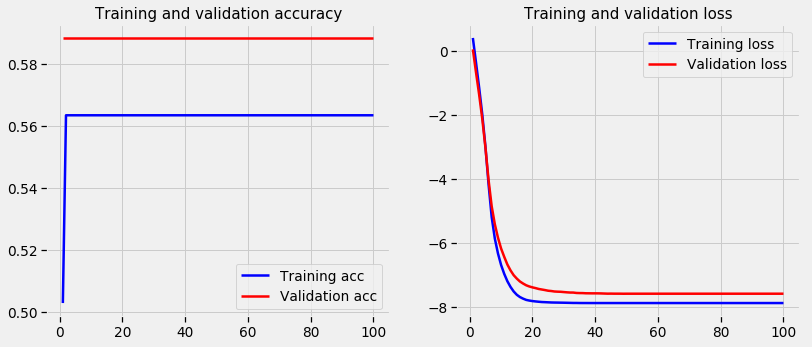

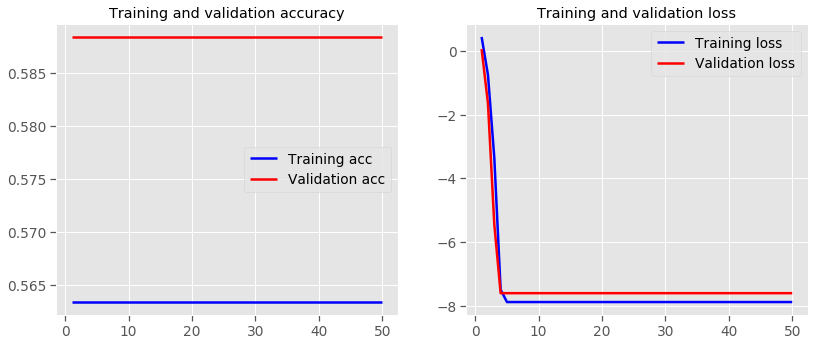

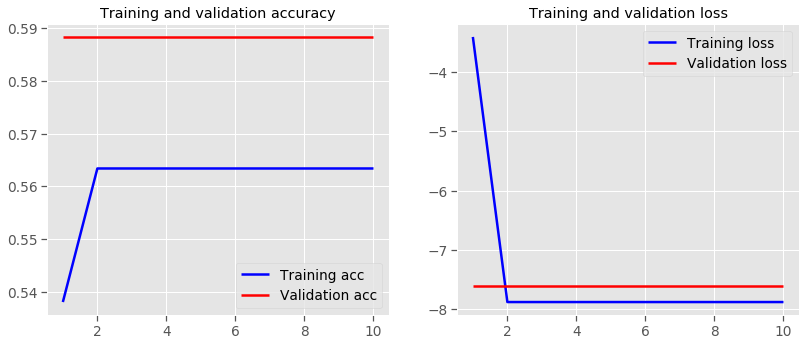

In [3]:
import csv
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re
import seaborn as sns
from scipy.stats import chi2
from random import seed
from random import randrange
import random
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from html.parser import HTMLParser
stop_words = set(stopwords.words('english'))
stop2=set(['kabirsingh','arjunreddy','films','album','ww','movies','people' ,'man','diya','see','talk','toh','go','bahut','shahidkapoor','shahid','kabir', 'singh', 'movie', 'bollywood', 'com','twitter', 'much', 'character', 'life', 'like', 'https', 'signalling', 'pic', 'watch', 'one', 'said', 'arjun', 'reddy', 'telugu','mein','hai'])
stop3=set(['real','future','film','hindi','sunaa','yaar','apni','congrats','watched','kapoor','watching','society','itfantastic','love','let','day','friends', 'friend', 'ke', 'lots', 'shown','time','hard','review','preeti','story','want','heart','girl','makes','news','advanikiara','public','http'])
tweets=[]
tweet=[]
def strip_non_ascii(string):
    ''' Returns the string without non ASCII characters'''
    stripped = (c for c in string if 0 < ord(c) < 127)
    return ''.join(stripped)
stop_words=stop_words|stop2|stop3   
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

x=[]
y=[]
import string
def clear_punctuation(s):
    clear_string = ""
    for symbol in s:
        if symbol not in string.punctuation:
            clear_string += symbol
    
    text=clear_string
    newString = text.lower()
    newString = re.sub(r"'s\b","",newString)
    # remove punctuations
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    long_words=[]
    # remove short word
    for i in newString.split():
        if len(i)>=3 and len(i) <=13:                  
            long_words.append(i)
    return (" ".join(long_words)).strip()
with open('../input/tweets-bollywood-movie-kabir-singh/twitter_kabir_singh_bollywood_movie.csv', 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    count=0
    print(count)
    for row in reader:
        tweet= dict()
        tweet['orig'] = row[15]
        tweet['id'] = (float(row[4]))
        tweet['pubtime'] = (row[2])
        tweet['favcount']=(int(row[12]))
        tweet['retweetcount']=(int(row[13]))
        # Ignore retweets
        if re.match(r'^RT.*', tweet['orig']):
            continue
        tweet['clean'] = tweet['orig']
        tweet['clean'] = ''.join(''.join(s)[:2] for _, s in itertools.groupby(tweet['clean']))
        tweet['clean'] = re.sub(r'[^\x00-\x7F]+',' ', tweet['clean'])
        tweet['clean'] = re.sub(r':', '', tweet['clean'])
        tweet['clean'] = re.sub(r'‚Ä¶', '', tweet['clean'])
        tweet['clean'] = emoji_pattern.sub(r'', tweet['clean'])
        tweet['clean'] = re.sub(r'\W', ' ', tweet['clean'])
        tweet['clean']= re.sub(r'\s+[a-zA-Z]\s+', ' ', tweet['clean'])
    # Remove single characters from the start
        tweet['clean'] = re.sub(r'\^[a-zA-Z]\s+', ' ', tweet['clean']) 
    # Substituting multiple spaces with single space
        tweet['clean'] = re.sub(r'\s+', ' ', tweet['clean'], flags=re.I)
    # Removing prefixed 'b'
        tweet['clean'] = re.sub(r'^b\s+', '', tweet['clean'])
        tweet['clean']= " ".join([i for i in re.sub(r'[^a-zA-Z\s]', "", tweet['clean']).lower().split() if i not in stop_words])
        tweet['clean']=clear_punctuation(tweet['clean'])
        # Remove all non-ascii characters
        tweet['clean'] = strip_non_ascii(tweet['clean'])
        # Normalize case
        tweet['clean'] = tweet['clean'].lower()
        # Remove URLS. 
        tweet['clean'] = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', tweet['clean'])
        ' '.join(word for word in tweet['clean'].split() if len(word)>3)   
        blob = TextBlob(tweet['clean'])
        tweet['TextBlob']=blob
        #x.append(tweet['clean'])  
        tweets.append(tweet)
        count=count+1
        #if(count==9500):
          #  break
for tweet in tweets:
    tweet['polarity'] = float(tweet['TextBlob'].sentiment.polarity)
    tweet['subjectivity'] = float(tweet['TextBlob'].sentiment.subjectivity)
    if tweet['polarity'] >= 0.1:
        #tweet['sentiment'] = 'positive'
        tweet['sentiment_val']=2
    elif tweet['polarity'] <= -0.1:
        #tweet['sentiment'] = 'negative'
        tweet['sentiment_val']=3
    else:
        #tweet['sentiment'] = 'neutral'
        tweet['sentiment_val']=1
tweets_sorted=tweets
tweetdf=pd.DataFrame(tweets_sorted)

tweetdf['char_count'] = tweetdf['clean'].apply(len)
tweetdf['word_count'] = tweetdf['clean'].apply(lambda x: len(x.split()))
tweetdf['word_density'] = tweetdf['char_count'] / (tweetdf['word_count']+1)
train2, test2 = train_test_split(tweets_sorted, test_size=0.3, random_state=1)
print(tweetdf)
traindf=pd.DataFrame(train2)
testdf=pd.DataFrame(test2)
tweet_s0 = tweetdf[tweetdf.sentiment_val ==3]
train_s0 = traindf[traindf.sentiment_val ==3]
train_s1=traindf[traindf.sentiment_val ==1]
train_s2=traindf[traindf.sentiment_val ==2]
test_s0 = testdf[testdf.sentiment_val ==3]
test_s1=testdf[testdf.sentiment_val ==1]
test_s2=testdf[testdf.sentiment_val ==2]



from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from nltk import pos_tag
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer 
ps = PorterStemmer()  
lemmatizer = WordNetLemmatizer() 
for index,row in tweet_s0.iterrows():
    #print(index,lemmatizer.lemmatize(row['clean']))
    row['clean']=lemmatizer.lemmatize(row['clean'])
    words=(row['clean']) 
   
    pp = [" ".join([ps.stem(word) for word in words.split(" ")]) ]
    row['clean']=pp
   


    



def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = tweet_s0[['subjectivity', 'polarity','char_count','word_count','word_density']].head(1500)
df_x['mahala'] = mahalanobis(x=df_x, data=tweet_s0[['subjectivity', 'polarity','char_count','word_count','word_density']])
print(chi2.ppf((1-0.01), df=4))


#

print(df_x[df_x['mahala'] >13])
df_x['hateclass'] = 2
df_x.loc[df_x['mahala'] <= 4, 'hateclass'] = 1
df_x.loc[df_x['mahala'] >13, 'hateclass'] = 3



tweet_s0['mahala']=df_x['mahala']
tweet_s0['hateclass']=df_x['hateclass']
del tweet_s0['sentiment_val']

print(tweet_s0)
            
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(tweetdf[['subjectivity', 'polarity','char_count','word_count','word_density']], tweetdf['sentiment_val'],test_size=0.3)


def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    
    trainSet = []
    copy = dataset.values.tolist()
    
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    
    return [trainSet, copy]





trainingSet, testSet = splitDataset(tweet_s0[['subjectivity', 'polarity','char_count','word_count','word_density','mahala','hateclass']], 0.67)
#tweet_s0.sort_index(axis=0, level=None, ascending=True, inplace=True, kind='quicksort', na_position='last', sort_remaining=True, by=None)+

print("WordCloud for Negative words/Hate speech in Negative tweets")
words_cleaned = [word for word in tweet_s0.clean if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT']
words_without_stopwords = [word for word in words_cleaned if not word in stop_words]
all_text = ' '.join(word for word in words_without_stopwords)
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
import math
def mean(numbers):
    
    return sum(numbers)/float(len(numbers))
 
def stdev(numbers):
    avg = mean(numbers)
    try:
        variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
        return math.sqrt(variance)
    except:
        return 0
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries


train_x.sort_index(axis=0, level=None, ascending=True, inplace=True, kind='quicksort', na_position='last', sort_remaining=True, by=None)
train_y.sort_index(axis=0, level=None, ascending=True, inplace=True, kind='quicksort', na_position='last', sort_remaining=True)


for index, row in train_x.iterrows():
    #print(index,'\t',type(row['favcount']),"\t",type(row['retweetcount']))
    
    row['subjectivity'] = row['subjectivity'].astype(float)
    row['polarity'] = row['polarity'].astype(float)

    

def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated


def summarizeByClass(dataset):
  
   
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries
    
def calculateProbability(x, mean, stdev):
    try:
        exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    
        sol= (1 / (math.sqrt(2*math.pi) * stdev)) * exponent
        return sol
    except:
        return 0

def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    
    sol= (correct/float(len(testSet))) * 100.0
    
        
    return (sol) 
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

summaries = summarizeByClass(trainingSet)
	# test model

predictions = getPredictions(summaries, testSet)
accuracy = getAccuracy(testSet, predictions)
print("Accuracy of Naive Bayes:",accuracy)


def predict2(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict2(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict2(node['right'], row)
        else:
            return node['right']


def bagging_predict(trees, row):
    predictions = [predict2(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

# Create child splits for a node or make terminal
def split(node, max_depth, min_size, n_features, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
	# process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left, n_features)
        split(node['left'], max_depth, min_size, n_features, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right, n_features)
        split(node['right'], max_depth, min_size, n_features, depth+1)
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = dataset.values.tolist()
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right
def gini_index(groups, classes):
	# count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini

def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores
def get_split(dataset, n_features):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    features = list()
    while len(features) < n_features:
        index = randrange(len(dataset[0])-1)
        if index not in features:
            features.append(index)
    for index in features:
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

def build_tree(train, max_depth, min_size, n_features):
    root = get_split(train, n_features)
    split(root, max_depth, min_size, n_features, 1)
    return root
def subsample(dataset, ratio):
    sample = list()
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        index = randrange(len(dataset))
        sample.append(dataset[index])
    return sample
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

def random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features):
    trees = list()
    for i in range(n_trees):
        sample = subsample(train, sample_size)
        tree = build_tree(sample, max_depth, min_size, n_features)
        trees.append(tree)
    predictions = [bagging_predict(trees, row) for row in test]
    return(predictions)

dataset = tweet_s0[['subjectivity', 'polarity','char_count','word_count','word_density','mahala','hateclass']]
n_folds = 5
max_depth = 10
min_size = 1
sample_size = 1.0
n_features = 6

for n_trees in [1, 5, 10]:
    scores = evaluate_algorithm(dataset, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
    print('Trees: %d' % n_trees)
    print('Scores: %s' % scores)
    print('Mean Accuracy of Random Forest: %.3f%%' % (sum(scores)/float(len(scores))))

train_x2, valid_x2, train_y2, valid_y2 = model_selection.train_test_split(tweet_s0[['subjectivity', 'polarity','favcount','retweetcount','char_count','word_count','word_density','mahala']], tweet_s0['hateclass'],test_size=0.33)

print("Confusion Matrix:")
model1 = LogisticRegression()
model1 = model1.fit(train_x2, train_y2)
pred = model1.predict(valid_x2)
print(pred)
cm=metrics.confusion_matrix(valid_y2,pred)
print(cm)
plt.imshow(cm, cmap='binary')


#SVM Implementation
print("SVM")
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_x2, train_y2)
y_pred = svclassifier.predict(valid_x2)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(valid_y2,y_pred))
print(classification_report(valid_y2,y_pred))

print("NaiveBayes")
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(train_x2, train_y2).predict(valid_x2)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(valid_y2,y_pred))
print(classification_report(valid_y2,y_pred))

print("Random Forest")
from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier()
y_pred = rfc.fit(train_x2, train_y2).predict(valid_x2)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(valid_y2,y_pred))
print(classification_report(valid_y2,y_pred))

print("KNN")
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
y_pred = knn.fit(train_x2, train_y2).predict(valid_x2)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(valid_y2,y_pred))
print(classification_report(valid_y2,y_pred))

'''
print("Kernel SVM:")
svclassifier2 = SVC(kernel='poly', degree=8)
svclassifier2.fit(train_x2, train_y2)
y_pred2 = svclassifier2.predict(valid_x2)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(valid_y2,y_pred2))
print(classification_report(valid_y2,y_pred2))

'''





def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
print("CNN")
from sklearn.feature_extraction.text import CountVectorizer
sentences_train, sentences_test, y_train, y_test = train_test_split(tweet_s0['clean'], tweet_s0['hateclass'], test_size=0.33, random_state=1000)
count_vectorizer = CountVectorizer(stop_words=stop_words)
count_data = count_vectorizer.fit_transform(sentences_train)
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print("Accuracy:", score)


pred3 = classifier.predict(X_test)
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))
plot_10_most_common_words(count_data, count_vectorizer)


from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train,epochs=100,verbose=False,validation_data=(X_test, y_test),batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))







def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

plt.style.use('ggplot')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
maxlen = 70

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
vocab_size = len(tokenizer.word_index) + 1

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


from sklearn.naive_bayes import MultinomialNB
#print(text_counts)
#Import scikit-learn metrics module for accuracy calculation

from sklearn.feature_extraction.text import TfidfVectorizer,HashingVectorizer, CountVectorizer
from sklearn import naive_bayes,metrics, linear_model,svm
from nltk.corpus import stopwords
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))
tf=TfidfVectorizer()
text_tf= tf.fit_transform(tweet_s0.clean)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    text_tf, tweet_s0.hateclass, test_size=0.33, random_state=123)
clf = MultinomialNB().fit(X_train2, y_train2)
predicted= clf.predict(X_test2)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test2, predicted))

import numpy as np
import itertools
import operator
from datetime import datetime
import sys

vocabulary_size = 8000

X_trainnpy = X_train

def extractDigits(lst): 
    return list(map(lambda el:[el], lst)) 
      
              
y_trainnpy=np.asarray(extractDigits(y_train.tolist())) 

 
class RNNNumpy():
    def __init__(self, word_dim, hidden_dim = 100, bptt_truncate = 4):
        # assign instance variable
        self.word_dim = word_dim
        self.hidden_dim = hidden_dim
        self.bptt_truncate = bptt_truncate
        # random initiate the parameters
        self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))


def softmax(x):
    xt = np.exp(x - np.max(x))
    return xt / np.sum(xt)

def forward_propagation(self, x):
    # total num of time steps, len of vector x
    T = len(x)
    # during forward propagation, save all hidden stages in s, S_t = U .dot x_t + W .dot s_{t-1}
    # we also need the initial state of s, which is set to 0
    # each time step is saved in one row in s，each row in s is s[t] which corresponding to an rnn internal loop time
    s = np.zeros((T+1, self.hidden_dim))
    s[-1] = np.zeros(self.hidden_dim)
    # output at each time step saved as o, save them for later use
    o = np.zeros((T, self.word_dim))
    for t in np.arange(T):
        # we are indexing U by x[t]. it is the same as multiplying U with a one-hot vector
        s[t] = np.tanh(self.U[:, x[t]] + self.W.dot(s[t-1]))
        o[t] = softmax(self.V.dot(s[t]))
    return [o, s]

RNNNumpy.forward_propagation = forward_propagation



def predict(self, x):
    o, s = self.forward_propagation(x)
    return np.argmax(o, axis = 1)

RNNNumpy.predict = predict

np.random.seed(10)
model = RNNNumpy(vocabulary_size)
o, s = model.forward_propagation(X_trainnpy[10])
print(o.shape)
print(o)

predictions = model.predict(X_trainnpy[10])
print(predictions.shape)
print(predictions) 

## 2. calculate the loss
'''
the loss is defined as
L(y, o) = -\frac{1}{N} \sum_{n \in N} y_n log(o_n)
'''
def calculate_total_loss(self, x, y):
    L = 0
    # for each sentence ...
    for i in np.arange(len(y)):
        o, s = self.forward_propagation(x[i])
        # we only care about our prediction of the "correct" words
        correct_word_predictions = o[np.arange(len(y[i])), y[i]]
        # add to the loss based on how off we were
        L += -1 * np.sum(np.log(correct_word_predictions))
    return L

def calculate_loss(self, x, y):
    # divide the total loss by the number of training examples
    N = np.sum((len(y_i) for y_i in y))
    return self.calculate_total_loss(x, y)/N

RNNNumpy.calculate_total_loss = calculate_total_loss
RNNNumpy.calculate_loss = calculate_loss

print("Expected Loss for random prediction: %f" % np.log(vocab_size))
print("Actual loss: %f" % model.calculate_loss(X_trainnpy[:1000], y_trainnpy[:1000]))

def bptt(self, x, y):
    T = len(y)
    # perform forward propagation
    o, s = self.forward_propagation(x)
    # we will accumulate the gradients in these variables
    dLdU = np.zeros(self.U.shape)
    dLdV = np.zeros(self.V.shape)
    dLdW = np.zeros(self.W.shape)
    delta_o = o
    delta_o[np.arange(len(y)), y] -= 1   # it is y_hat - y
    # for each output backwards ...
    for t in np.arange(T):
        dLdV += np.outer(delta_o[t], s[t].T)    # at time step t, shape is word_dim * hidden_dim
        # initial delta calculation
        delta_t = self.V.T.dot(delta_o[t]) * (1 - (s[t] ** 2))
        # backpropagation through time (for at most self.bptt_truncate steps)
        # given time step t, go back from time step t, to t-1, t-2, ...
        for bptt_step in np.arange(max(0, t-self.bptt_truncate), t+1)[::-1]:
            # print("Backprogation step t=%d bptt step=%d" %(t, bptt_step))
            dLdW += np.outer(delta_t, s[bptt_step - 1])
            dLdU[:, x[bptt_step]] += delta_t
            # update delta for next step
            dleta_t = self.W.T.dot(delta_t) * (1 - s[bptt_step-1]**2)
    return [dLdU, dLdV, dLdW]

RNNNumpy.bptt = bptt

'''
verify the gradient by its definition:
\frac{\partial{L}}{\partial{\theta}} = \lim_{h \propto 0} \frac{J(\theta + h) - J(\theta - h)}{2h}
'''
def gradient_check(self, x, y, h = 0.001, error_threshold = 0.01):
    # calculate the gradient using backpropagation
    bptt_gradients = self.bptt(x, y)
    # list of all params we want to check
    model_parameters = ["U", "V", "W"]
    # gradient check for each parameter
    for pidx, pname in enumerate(model_parameters):
        # get the actual parameter value from model, e.g. model.W
        parameter = operator.attrgetter(pname)(self)
        print("performing gradient check for parameter %s with size %d. " %(pname, np.prod(parameter.shape)))
        # iterate over each element of the parameter matrix, e.g. (0,0), (0,1)...
        it = np.nditer(parameter, flags = ['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            ix = it.multi_index
            # save the original value so we can reset it later
            original_value = parameter[ix]
            # estimate the gradient using (f(x+h) - f(x-h))/2h
            parameter[ix] = original_value + h
            gradplus = self.calculate_total_loss([x], [y])
            parameter[ix] = original_value - h
            gradminus = self.calculate_total_loss([x], [y])
            estimated_gradient = (gradplus - gradminus)/(2*h)
            # reset parameter to the original value
            parameter[ix] = original_value
            # the gradient for this parameter calculated using backpropagation
            backprop_gradient = bptt_gradients[pidx][ix]
            # calculate the relative error (|x - y|)/(|x|+|y|)
            relative_error = np.abs(backprop_gradient - estimated_gradient)/(np.abs(backprop_gradient) + np.abs(estimated_gradient))
            # if the error is too large fail the gradient check
            if relative_error < error_threshold:
                print("Gradient check error: parameter = %s ix = %s" %(pname, ix))
                print("+h Loss: %f" % gradplus)
                print("-h Loss: %f" % gradminus)
                print("Estimated gradient: %f" % estimated_gradient)
                print("Backpropagation gradient: %f" % backprop_gradient)
                print("Relative error: %f" % relative_error)
                return
            it.iternext()
        print("Gradient check for parameter %s passed. " %(pname))

RNNNumpy.gradient_check = gradient_check

grad_check_vocab_size = 100
np.random.seed(10)
model = RNNNumpy(grad_check_vocab_size, 10, bptt_truncate = 1000)
model.gradient_check([0,1,2,3], [1,2,3,4])



## 4. SGD implementation
'''
two step:
1. calculate the gradients and perform the updates for one batch
2. loop through the training set and adjust the learning rate
'''
### 4.1. perform one step of SGD
def numpy_sgd_step(self, x, y, learning_rate):
    dLdU, dLdV, dLdW = self.bptt(x, y)
    self.U -= learning_rate * dLdU
    self.V -= learning_rate * dLdV
    self.W -= learning_rate * dLdW
RNNNumpy.sgd_step = numpy_sgd_step

### 4.2. outer SGD loop
'''
 - model: 
 - X_train:
 - y_train:
 - learning_rate:
 - nepoch:
 - evaluate loss_after:
'''
def train_with_sgd(model, X_train, y_train, learning_rate = 0.005, nepoch = 100, evaluate_loss_after = 5):
    # keep track of the losses so that we can plot them later
    losses = []
    num_examples_seen = 0
    for epoch in range(nepoch):
        # optionally evaluate the loss
        if (epoch % evaluate_loss_after == 0):
            loss = model.calculate_loss(X_train, y_train)
            losses.append((num_examples_seen, loss))
            time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            print("%s: loss after num_examples_seen=%d epoch=%d: %f" %(time, num_examples_seen, epoch, loss))
            # adjust the learning rate if loss increases
            if (len(losses) > 1 and losses[-1][1] > losses[-2][1]):
                learning_rate = learning_rate * 0.5
                print("setting learning rate to %f" %(learning_rate))
            sys.stdout.flush()
        # for each training example...
        for i in range(len(y_train)):
            # one sgd step
            model.sgd_step(X_train[i], y_train[i], learning_rate)
            num_examples_seen += 1

np.random.seed(10)
model = RNNNumpy(vocab_size)
%timeit model.sgd_step(X_trainnpy[10], y_trainnpy[10], 0.005)
np.random.seed(10)
model = RNNNumpy(vocab_size)
losses = train_with_sgd(model, X_trainnpy, y_trainnpy, nepoch = 10, evaluate_loss_after = 1)

from sklearn import model_selection, naive_bayes, svm


Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(y_train2)
Test_Y = Encoder.fit_transform(y_test2)
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train2,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(X_test2)
# Use accuracy_score function to get the accuracy

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train2,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test2)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
knn.fit(train_x2,train_y2)

#Predict the response for test dataset
y_pred = knn.predict(valid_x2)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy for KNN :",metrics.accuracy_score(valid_y2, y_pred))



[[-0.26055823  0.69707278]
 [-0.23911966  0.37345684]
 [-0.68238232  0.88719888]]


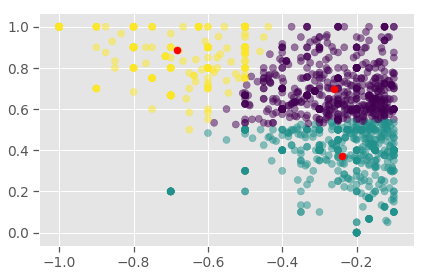

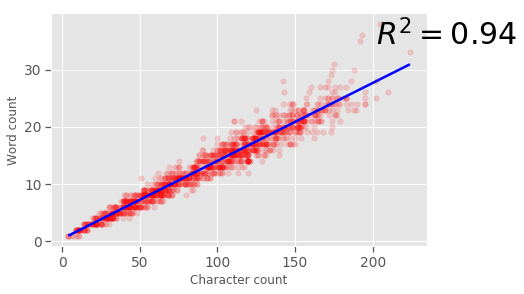



TOP NEGATIVE TWEETS
1 shocking things scar toxic masculinity spoiler alert ylink wml download roz dhan app dist rozcloud mgmz
2 saw beyond awful
3 padmavat distortion history haider insulting indian army insulting hindu gods unapologetic celebration toxic masculinity
4 think tabu supposed protagonist neither director wanted sympathize apply rooted adored even pathetic person
5 padmavat justa notdistortion history haider justa insulting indian army insulting hindu godsfor unapologetic celebration toxic masculinity liberals
6 women critics considering awful lwreqxhgwh
7 padmavat distortion history haider insulting indian army insulting hindu gods unapologetic celebration toxic masculinity
8 volcano disgusted made fashionable play rebel without pause kya haider kya uddta punjab kya yeh facebook posts
9 padmavat distortion history haider insulting indian army insulting hindu gods unapologetic celebration toxic masculinity
10 bakwas boring men
11 read reviews absolutely disgusted
12 pathe

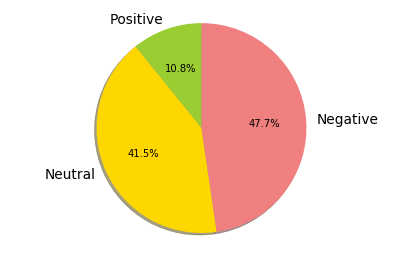

Percentage of positive tweets: 10.837201856891308
Percentage of negative tweets: 47.686889707059386
Percentage of neutral tweets: 41.4759084360493
Number of negative tweets: 5958


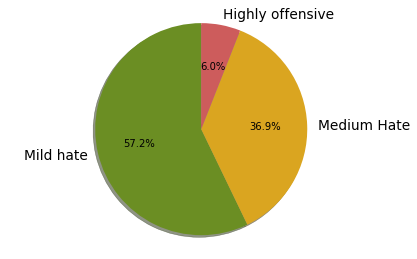

Percentage of mildly offensive tweets: 57.163958641063516
Percentage of moderately hateful tweets: 36.85376661742984
Percentage of highly profane tweets: 5.982274741506647


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


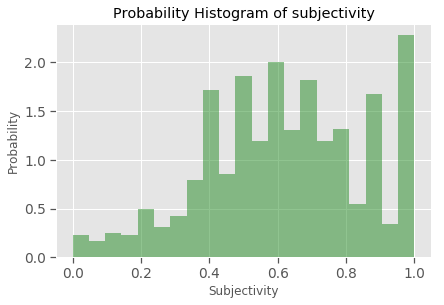

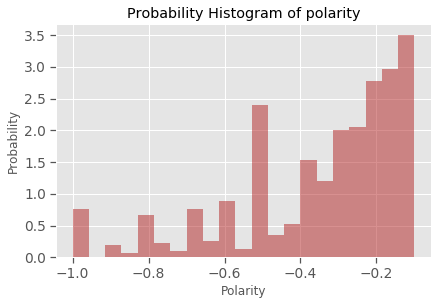

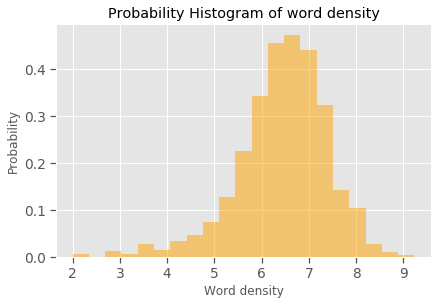

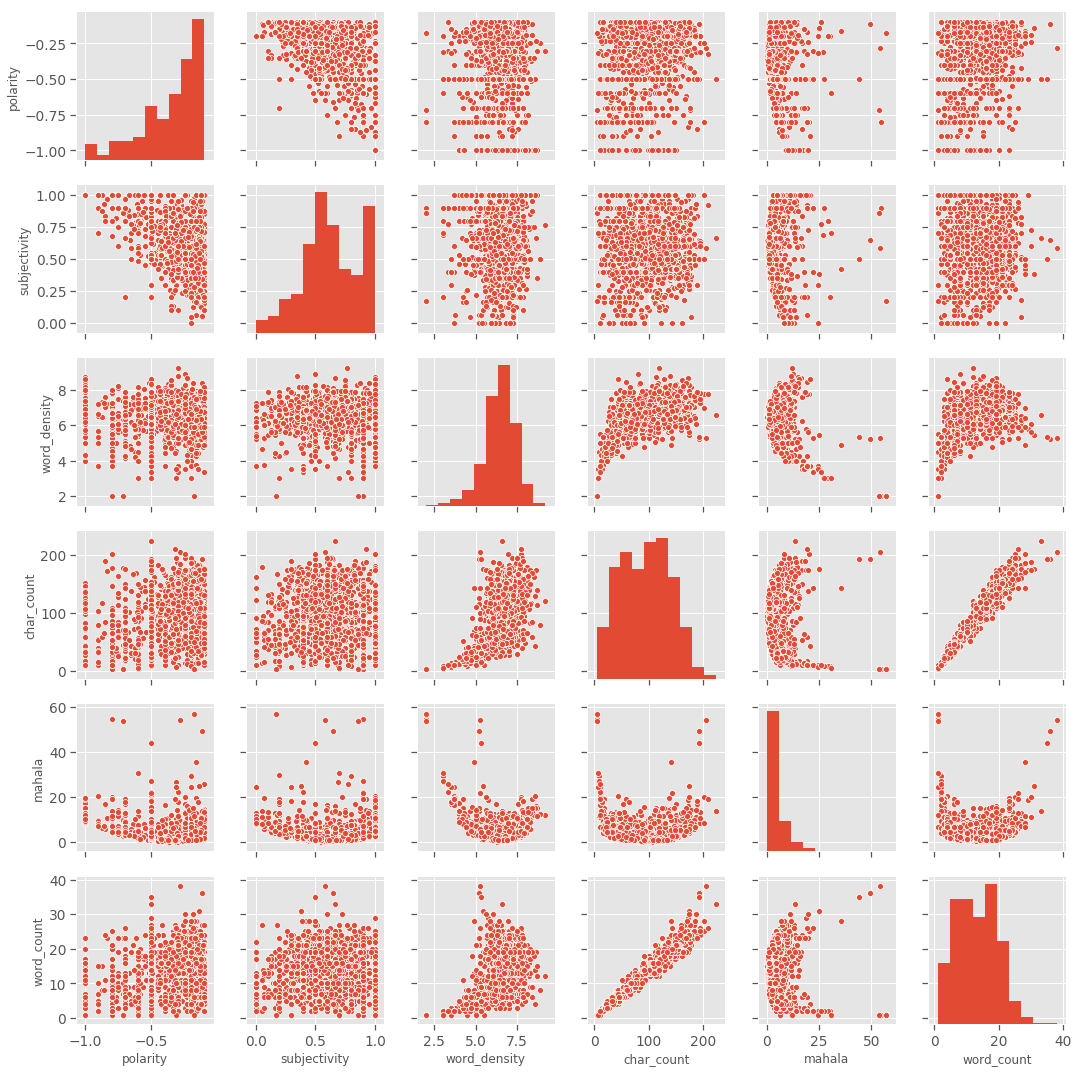

In [4]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
tweet_s1 = tweetdf[tweetdf.sentiment_val ==1]
tweet_s2 = tweetdf[tweetdf.sentiment_val ==2]

#dff = DataFrame(tweet_s0,columns=['subjectivity', 'polarity','favcount','retweetcount','mahala','hateclass'])
dff1=DataFrame(tweet_s0,columns=['polarity','subjectivity'])
kmeans = KMeans(n_clusters=3).fit(dff1)
centroids = kmeans.cluster_centers_
print(centroids)
f1 = plt.figure()
plt.scatter(dff1['polarity'],dff1['subjectivity'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0],centroids[:, 1],  c='red', s=50)

f2 = plt.figure()
xd=tweet_s0['char_count']
yd=tweet_s0['word_count']
plt.scatter(xd,yd, s=30, alpha=0.15, marker='o',c='red')

# determine best fit line
par = np.polyfit(xd,yd, 1, full=True)



slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),'$R^2 = %0.2f$'% Rsqr, fontsize=30)

plt.xlabel("Character count")
plt.ylabel("Word count")

# error bounds
yerr = [abs(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)]
par = np.polyfit(xd, yerr, 2, full=True)

yerrUpper = [(xx*slope+intercept)+(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]
yerrLower = [(xx*slope+intercept)-(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]

plt.plot(xl, yl, '-b')
#plt.plot(xd, yerrLower, '--r')
#plt.plot(xd, yerrUpper, '--r')
plt.show()




print("\n\nTOP NEGATIVE TWEETS")

sort_by_polarity = tweet_s0.sort_values('polarity')
cleanlist=sort_by_polarity['clean'].tolist()
polarlist=sort_by_polarity['polarity'].tolist()
subjectlist=sort_by_polarity['subjectivity'].tolist()
mahalalist=sort_by_polarity['mahala'].tolist()
ct=1
for row in cleanlist:
    print(ct,row)
    ct+=1
    if(ct>100):
        break

pos = len(tweet_s0)
neu = len(tweet_s1)
neg = len(tweet_s2)
labels = 'Positive', 'Neutral', 'Negative'
labels2 = 'Mild hate', 'Medium Hate', 'Highly offensive'
sizes = [pos, neu, neg]
colors = ['yellowgreen', 'gold', 'lightcoral']
plt.figure()
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()
print("Percentage of positive tweets:",100*pos/(pos+neg+neu))
print("Percentage of negative tweets:",100*neg/(pos+neg+neu))  
print("Percentage of neutral tweets:",100*neu/(pos+neg+neu))  
print("Number of negative tweets:",neg)

maxhate=len((tweet_s0[tweet_s0.hateclass ==3]))
midhate=len((tweet_s0[tweet_s0.hateclass ==2]))
minhate=len((tweet_s0[tweet_s0.hateclass ==1]))
colors = ['olivedrab', 'goldenrod', 'indianred']
sizes = [minhate, midhate, maxhate]
plt.figure()
plt.pie(sizes, labels=labels2, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()
print("Percentage of mildly offensive tweets:",100*minhate/(minhate+midhate+maxhate))
print("Percentage of moderately hateful tweets:",100*midhate/(minhate+midhate+maxhate))  
print("Percentage of highly profane tweets:",100*maxhate/(minhate+midhate+maxhate))

plt.figure()
x = [d for d in subjectlist]
num_bins = 21
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='forestgreen', alpha=0.5)
plt.xlabel('Subjectivity')
plt.ylabel('Probability')
plt.title(r'Probability Histogram of subjectivity')

plt.figure()
x = [d for d in polarlist]
num_bins = 21
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='firebrick', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Probability')
plt.title(r'Probability Histogram of polarity')

plt.figure()
x = [d for d in sort_by_polarity['word_density'].tolist()]
num_bins = 21
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='orange', alpha=0.5)
plt.xlabel('Word density')
plt.ylabel('Probability')
plt.title(r'Probability Histogram of word density')


dff1=DataFrame(tweet_s0,columns=['polarity','subjectivity','word_density','char_count','mahala','word_count'])


sns.pairplot(dff1)

#print(sort_by_polarity.word_density.cov(sort_by_polarity.subjectivity))